<a href="https://colab.research.google.com/github/erika-ld/Pairs-Trading-Repo-ED-VU-Fall-24-/blob/wip-victoria/pairs_trading.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing** **Libraries**

In [84]:
import numpy as np
import pandas as pd
import pandas_datareader.data as pdr
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

# Adding Dates

In [25]:
# Set start date variable as start date for historical data (9/20/23)
start_date = dt.datetime(2023, 9, 20)
# Set end date variable as end date for historical data (9/20/24)
end_date = dt.datetime(2024, 9, 19)

# List of Stocks


In [77]:
# List of stocks(car companies):
# Telsa, BMW, Subaru, Porshe, Honda, Kia, Mzada, Toyota, Hyundai
stocks = ['TSLA', 'BMWKY', 'FUJHY', 'DRPRY', 'HMC', 'KS', 'MZDAY', 'TM', 'HYMTF', 'CHPT', 'EVGO', 'BLNK', 'WBX', 'SPWRQ']

# Download stock data INCLUDING ADJ Close price
stocks_df = yf.download(stocks, start=start_date, end=end_date, auto_adjust=False)

# Dropping everything, but ADJ close price
stocks_df.drop(columns = ['Open', 'High', 'Low','Close', 'Volume'], axis = 1, inplace = True)
stocks_df.head(5)

[*********************100%***********************]  14 of 14 completed


Price      Adj Close                                                     \
Ticker          BLNK      BMWKY  CHPT     DRPRY  EVGO  FUJHY        HMC   
Date                                                                      
2023-09-20      3.49  33.342468  5.18  9.687654  3.80  10.16  35.519745   
2023-09-21      3.14  33.106934  5.09  9.542340  3.65   9.97  34.644779   
2023-09-22      3.14  33.012718  5.02  9.484214  3.59  10.02  34.634945   
2023-09-25      2.95  32.532223  4.92  9.522964  3.52   9.88  34.615284   
2023-09-26      2.93  31.900990  4.85  9.183896  3.32   9.81  34.143391   

Price                                                                   
Ticker          HYMTF     KS MZDAY SPWRQ          TM        TSLA   WBX  
Date                                                                    
2023-09-20  37.490711  0.035  6.08  6.84  188.750000  262.589996  2.47  
2023-09-21  36.035679  0.035  5.97  6.62  186.300003  255.699997  2.27  
2023-09-22  36.035679  0.030  6.05  6.37  187.100006  244.880005  2.17  
2023-09-25  37.471813  0.035  6.00  6.10  184.839996  246.990005  2.34  
2023-09-26  37.018299  0.030  5.96  6.08  180.500000  244.119995  2.33

# Correlation Test

In [78]:

# Create a correlation matrix using panda's corr() method with the Pearson correlation method
correlation_matrix = stocks_df.corr(method='pearson')

# Iterate through the columns and replace the diagonal values (correlation = 1) with 0 in order to get the actual max correlation values
np.fill_diagonal(correlation_matrix.values, 0)
display(correlation_matrix)


Price            Adj Close                                                    \
Ticker                BLNK     BMWKY      CHPT     DRPRY      EVGO     FUJHY   
Price     Ticker                                                               
Adj Close BLNK    0.000000  0.395138  0.347931  0.326005 -0.102577  0.153154   
          BMWKY   0.395138  0.000000 -0.081915  0.631267 -0.497246  0.694368   
          CHPT    0.347931 -0.081915  0.000000  0.376783  0.216505 -0.285234   
          DRPRY   0.326005  0.631267  0.376783  0.000000 -0.385489  0.275337   
          EVGO   -0.102577 -0.497246  0.216505 -0.385489  0.000000 -0.624325   
          FUJHY   0.153154  0.694368 -0.285234  0.275337 -0.624325  0.000000   
          HMC     0.015999  0.681120 -0.007980  0.588564 -0.476078  0.802309   
          HYMTF  -0.291050  0.002267 -0.644952 -0.429766  0.087412  0.431673   
          KS      0.287046  0.661476 -0.114233  0.465526 -0.500700  0.369403   
          MZDAY   0.385221  0.711786  0.260475  0.693794 -0.566076  0.485540   
          SPWRQ   0.575412  0.303075  0.701413  0.567421 -0.267318 -0.034350   
          TM      0.111323  0.789533 -0.394177  0.414097 -0.597609  0.905871   
          TSLA    0.262464 -0.382276  0.576836 -0.105639  0.671817 -0.617797   
          WBX     0.338972  0.098996  0.841363  0.384705  0.140203 -0.238057   

Price                                                                         \
Ticker                 HMC     HYMTF        KS     MZDAY     SPWRQ        TM   
Price     Ticker                                                               
Adj Close BLNK    0.015999 -0.291050  0.287046  0.385221  0.575412  0.111323   
          BMWKY   0.681120  0.002267  0.661476  0.711786  0.303075  0.789533   
          CHPT   -0.007980 -0.644952 -0.114233  0.260475  0.701413 -0.394177   
          DRPRY   0.588564 -0.429766  0.465526  0.693794  0.567421  0.414097   
          EVGO   -0.476078  0.087412 -0.500700 -0.566076 -0.267318 -0.597609   
          FUJHY   0.802309  0.431673  0.369403  0.485540 -0.034350  0.905871   
          HMC     0.000000  0.228785  0.270014  0.588994  0.066425  0.842074   
          HYMTF   0.228785  0.000000 -0.166198 -0.480193 -0.804478  0.415741   
          KS      0.270014 -0.166198  0.000000  0.481994  0.333755  0.438802   
          MZDAY   0.588994 -0.480193  0.481994  0.000000  0.642169  0.529647   
          SPWRQ   0.066425 -0.804478  0.333755  0.642169  0.000000 -0.099801   
          TM      0.842074  0.415741  0.438802  0.529647 -0.099801  0.000000   
          TSLA   -0.542369 -0.450905 -0.312699 -0.183333  0.340181 -0.703099   
          WBX     0.004387 -0.648529  0.144933  0.294207  0.727690 -0.330045   

Price                                 
Ticker                TSLA       WBX  
Price     Ticker                      
Adj Close BLNK    0.262464  0.338972  
          BMWKY  -0.382276  0.098996  
          CHPT    0.576836  0.841363  
          DRPRY  -0.105639  0.384705  
          EVGO    0.671817  0.140203  
          FUJHY  -0.617797 -0.238057  
          HMC    -0.542369  0.004387  
          HYMTF  -0.450905 -0.648529  
          KS     -0.312699  0.144933  
          MZDAY  -0.183333  0.294207  
          SPWRQ   0.340181  0.727690  
          TM     -0.703099 -0.330045  
          TSLA    0.000000  0.529305  
          WBX     0.529305  0.000000

### Correlation Heat Matrix

<Axes: xlabel='Price-Ticker', ylabel='Price-Ticker'>

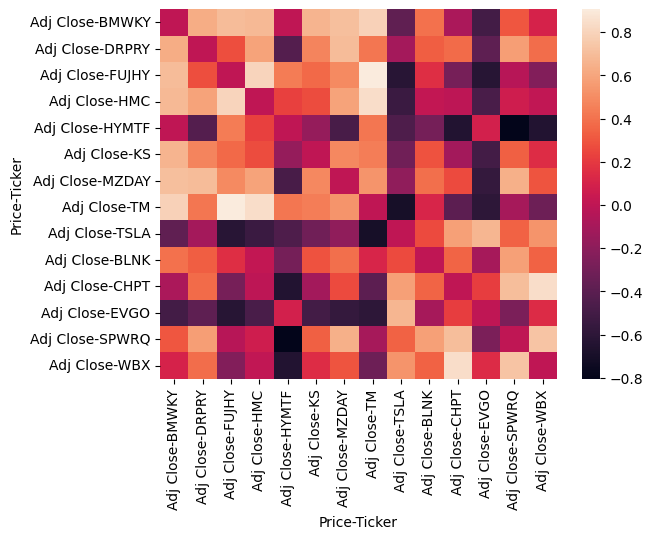

In [30]:
# Displaying correlation_matrix and interate through
display(sns.heatmap(correlation_matrix))

# We Chose to Compare Toyota Against all Other Stocks

[*********************100%***********************]  1 of 1 completed


<bound method NDFrame.head of Price        Adj Close
Ticker              TM
Date                  
2023-09-20  188.750000
2023-09-21  186.300003
2023-09-22  187.100006
2023-09-25  184.839996
2023-09-26  180.500000
...                ...
2024-09-12  176.179993
2024-09-13  175.389999
2024-09-16  176.229996
2024-09-17  173.149994
2024-09-18  176.710007

[251 rows x 1 columns]>